<a href="https://colab.research.google.com/github/Sarah1542/Test1-Student-Score-Prediction/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-----------------Imports-------------------

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


#-----------Uplode & Read DataSet---------

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
print("Uploaded files:", uploaded.keys())
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
pd.set_option('display.max_columns', None)
print(df.head())

Saving Student_Performance.csv to Student_Performance (1).csv
Uploaded files: dict_keys(['Student_Performance (1).csv'])
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


#--------------Data Cleaning-----------------


In [ ]:
df = pd.get_dummies(df, drop_first=True) #"regression only accept 0,1 so we convert it from yes/No "
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB
None
Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_Yes      0
dtype: int64
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10

#-----------Dataset Visualization-------------


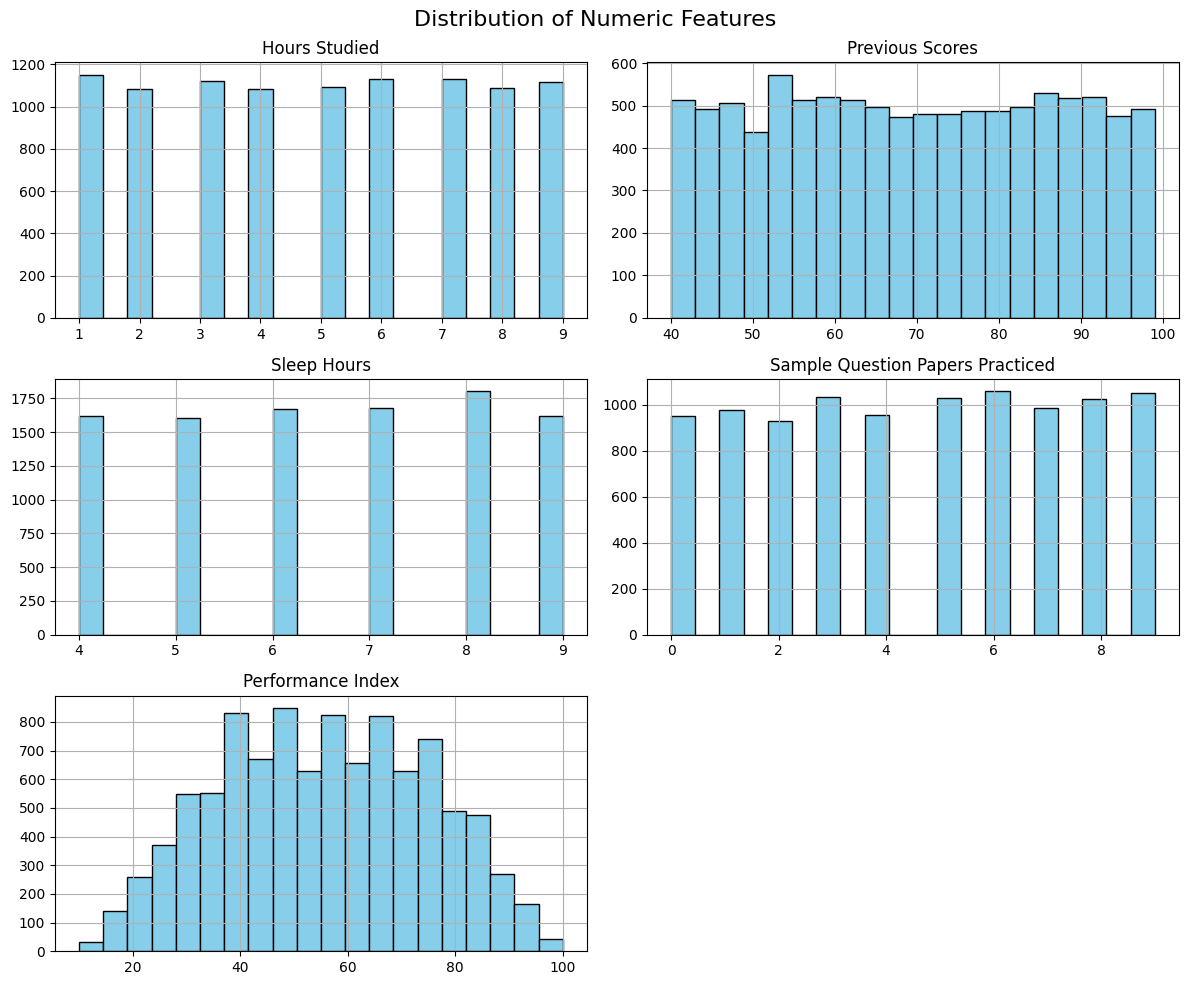

In [ ]:
#"Distribution of Numeric Features"

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


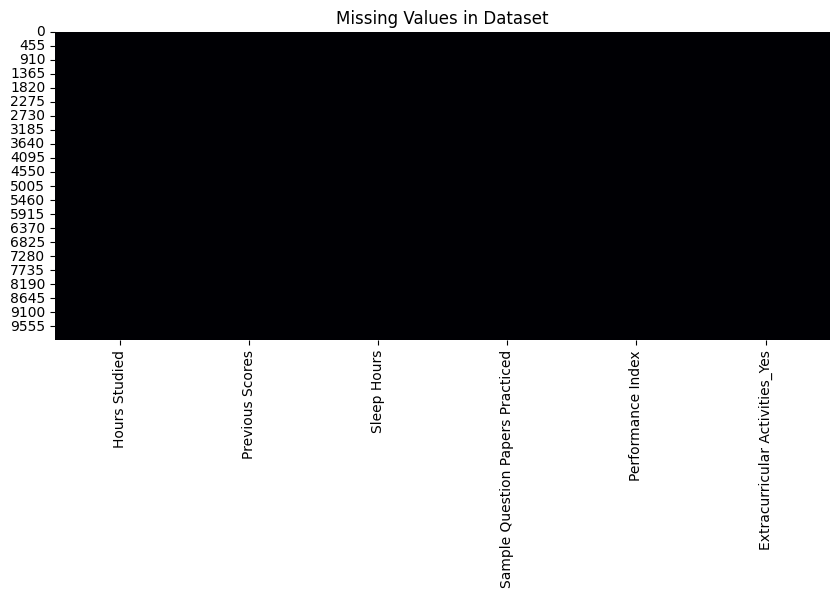

In [ ]:
#"Missing Values in Dataset"
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values in Dataset")
plt.show()



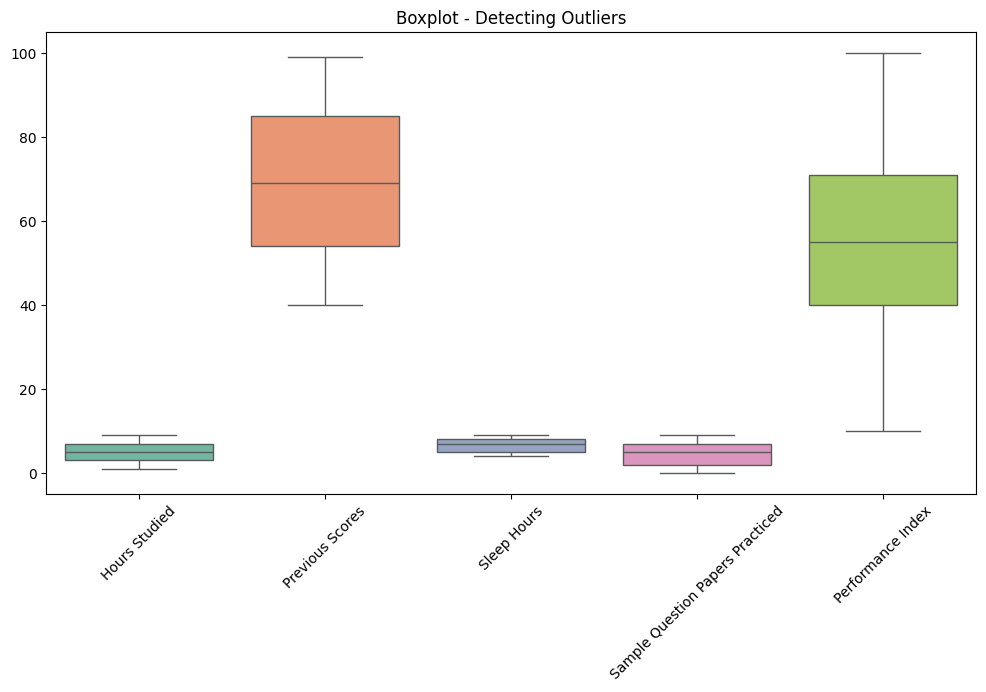

In [ ]:
#"Boxplot - Detecting Outliers"
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot - Detecting Outliers")
plt.show()

#---------------Split Data Train/Test----------

In [ ]:
x=df.drop("Performance Index",axis=1) #input
y=df["Performance Index"] #target
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

-----------------------Train Regression Model-----------------------

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

------------------------------Prediction------------------------------

In [ ]:
y_pred=model.predict(x_test)

-------------------------------Evaluation----------------------------

In [ ]:
print("r2_score is: ",r2_score(y_test,y_pred))##"if it close to 1 its perfect"
print("MSE is: ",mean_squared_error(y_test,y_pred))##"smaller MSE is better"

r2_score is:  0.9889832909573145
MSE is:  4.082628398521851


------------------------visualization prediction--------------------

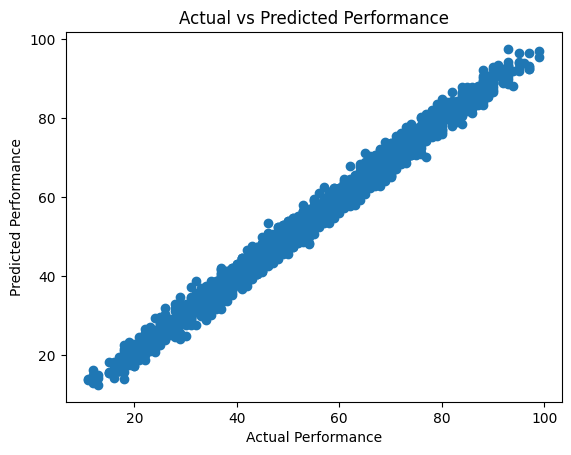

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.show()